In [6]:
import torch
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt


In [15]:
finetune_pred = torch.load('exp_result/diabetes/trained_models/random_remove_0.04_information_Batch_Unlearning/historical_clients_pred.pkl')
# finetune_pred = torch.load('exp_result/adult_income/LR/trained_models/random_remove_0.16_features_retrain/historical_clients_pred.pkl')
# finetune_pred = torch.load('exp_result/credit/MLP/trained_models/random_remove_1.0_information_retrain/historical_clients_pred.pkl')
finetune_pred = torch.tensor(finetune_pred)
finetune_delta = finetune_pred.diff(dim=0)
finetune_delta = finetune_delta.numpy()
# sum delta's second dimension and divede to get the average distributed percent
finetune_delta_sum_by_party = np.sum(finetune_delta, axis=1, keepdims=True)
finetune_delta_sum_by_party[np.where(np.abs(finetune_delta_sum_by_party) < 1e-6)] = np.nan
finetune_delta_distribution = finetune_delta / finetune_delta_sum_by_party
print('retrain_delta_distribution:', finetune_delta_distribution, '\n', np.array(finetune_delta_distribution).shape)

retrain_delta_distribution: [[[[ 5.48646156e-01  5.48645990e-01]
   [ 7.91915816e-01  7.91915568e-01]
   [ 7.43246672e-01  7.43246490e-01]
   ...
   [ 3.19072840e-01  3.19071703e-01]
   [ 6.14544064e-01  6.14543617e-01]
   [ 7.81770580e-01  7.81770720e-01]]

  [[ 6.94872455e-03  6.94886120e-03]
   [ 3.16497859e-03  3.16504160e-03]
   [ 2.85237685e-03  2.85243369e-03]
   ...
   [ 4.92518282e-01  4.92519209e-01]
   [ 2.49633269e-01  2.49633402e-01]
   [ 5.33219968e-03  5.33230750e-03]]

  [[ 1.77299513e-01  1.77299630e-01]
   [ 1.34979898e-01  1.34980020e-01]
   [ 8.70892990e-02  8.70893792e-02]
   ...
   [ 1.07302142e-01  1.07302344e-01]
   [ 6.61633449e-02  6.61637671e-02]
   [ 1.01733064e-01  1.01732782e-01]]

  [[ 2.67105607e-01  2.67105519e-01]
   [ 6.99393080e-02  6.99393711e-02]
   [ 1.66811652e-01  1.66811697e-01]
   ...
   [ 8.11067354e-02  8.11067433e-02]
   [ 6.96593215e-02  6.96592135e-02]
   [ 1.11164157e-01  1.11164191e-01]]]


 [[[ 5.19207381e-01  5.19203797e-01]
   [ 7.39

                 0             1             2             3             4   \
count  39380.000000  39380.000000  39380.000000  39380.000000  39380.000000   
mean       0.248526      0.499147     -0.121991      0.228710      0.024184   
std        7.766770      8.652533      8.813987      6.529200      2.072324   
min     -307.750557   -407.769895   -530.306898   -417.683107   -212.241705   
25%       -0.101531      0.100379     -0.324776      0.046498     -0.013192   
50%        0.237589      0.362424     -0.070644      0.189398      0.007202   
75%        0.634307      0.769057      0.077717      0.450555      0.023213   
max      401.234326    418.782175    627.121789    301.491863    228.724036   

                 5             6             7             8             9   \
count  39380.000000  39380.000000  39380.000000  39380.000000  39380.000000   
mean      -0.008550      0.016570      0.009834      0.050118     -0.015480   
std        3.182267      1.927085      3.316356    

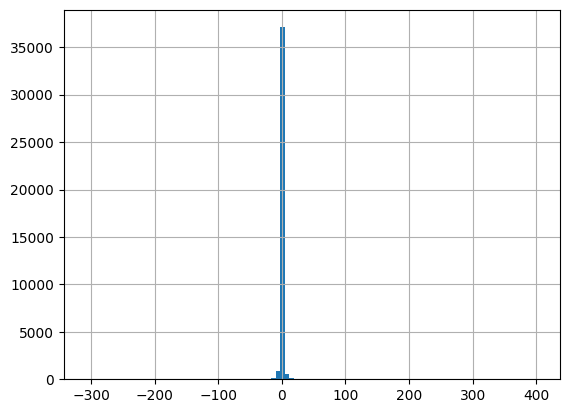

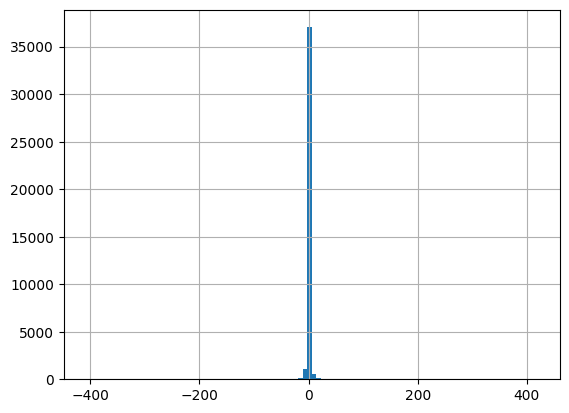

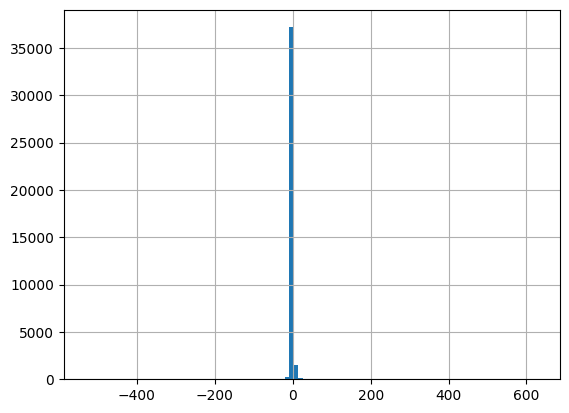

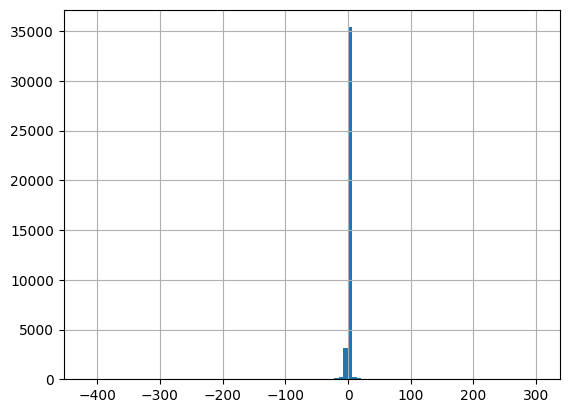

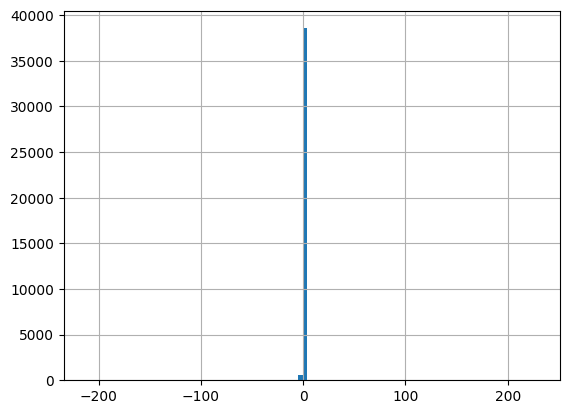

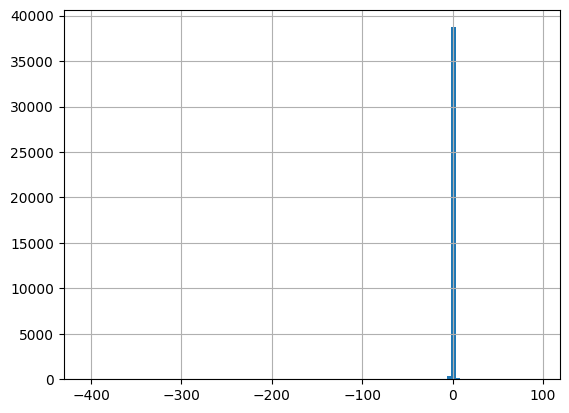

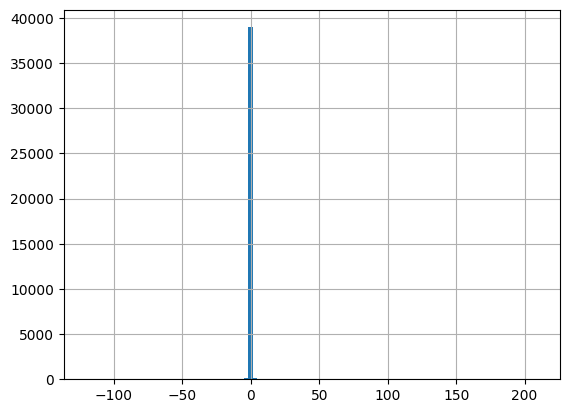

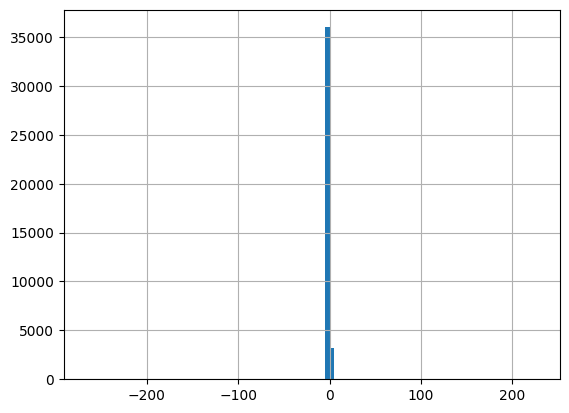

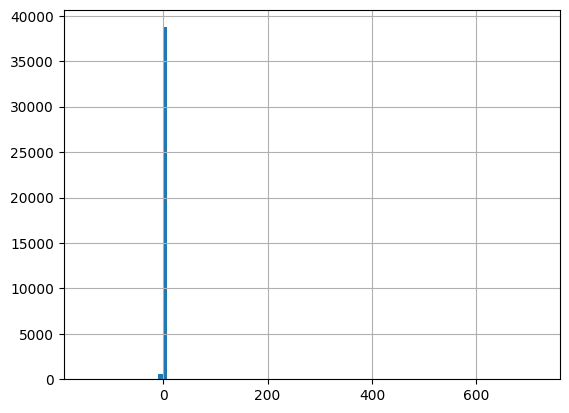

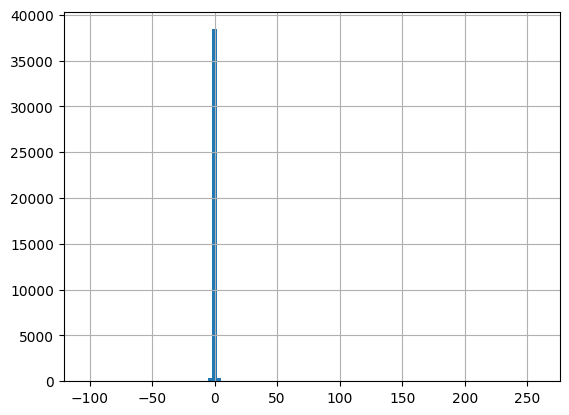

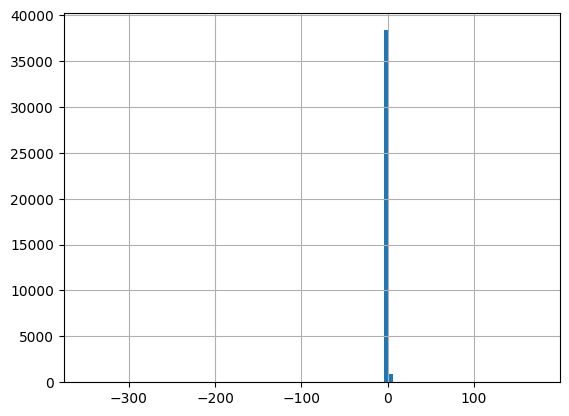

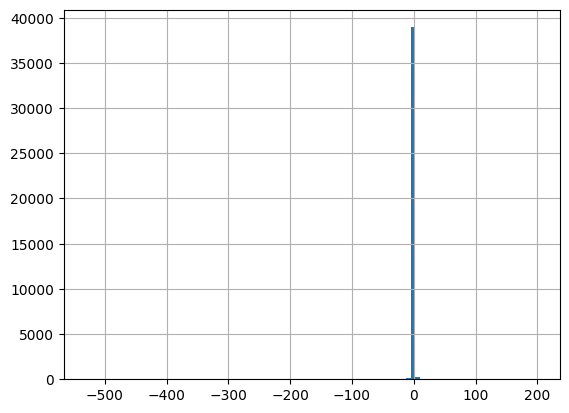

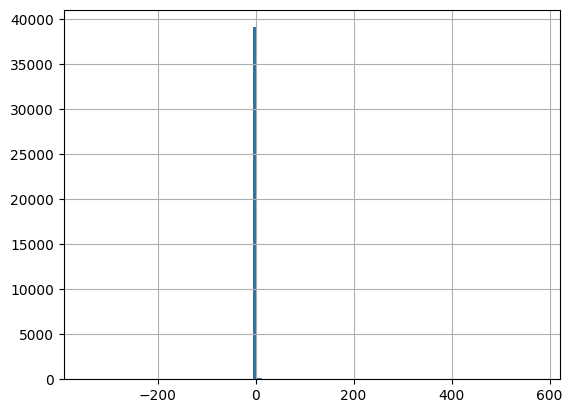

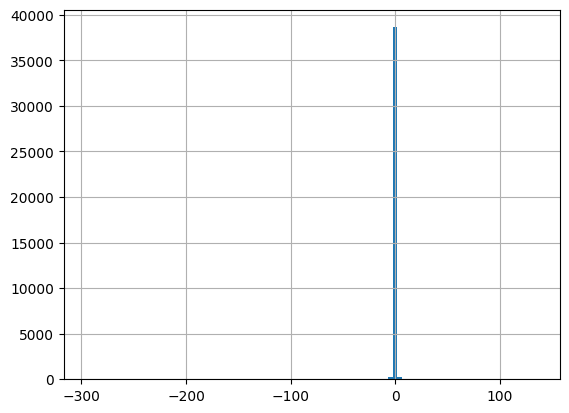

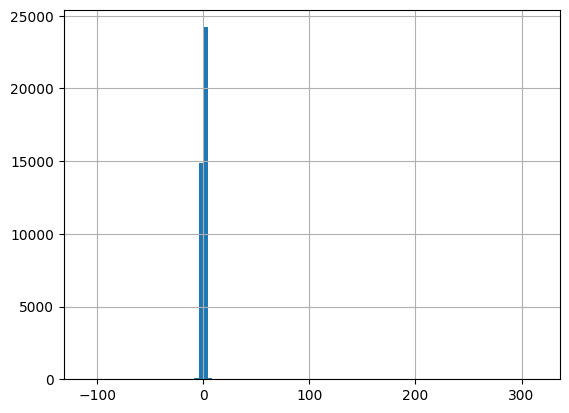

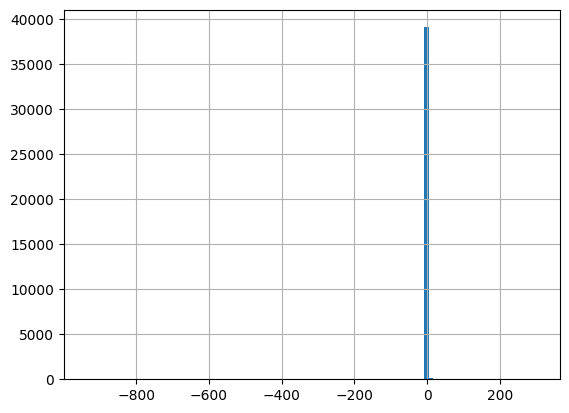

In [3]:
finetune_distribution1 = finetune_delta_distribution[-1,:,:,:]
finetune_distribution2 = finetune_delta_distribution[-2,:,:,:]
finetune_distribution3 = finetune_delta_distribution[-3,:,:,:]
finetune_distribution4 = finetune_delta_distribution[-4,:,:,:]
finetune_distribution5 = finetune_delta_distribution[-5,:,:,:]
finetune_distribution = 1 / 5 * (finetune_distribution1 + finetune_distribution2 + finetune_distribution3 + finetune_distribution4 + finetune_distribution5)
df_finetune_distribution = pd.DataFrame(finetune_distribution[:,:,0].squeeze()).T
finetune_distribution[np.isnan(finetune_distribution)] = 0
print(df_finetune_distribution.describe())
for i in range(df_finetune_distribution.shape[1]):
    df_finetune_distribution.iloc[:,i].hist(bins=100)
    plt.show()

                0           1           2           3
count  614.000000  614.000000  614.000000  614.000000
mean     0.615432    0.132603    0.117345    0.134619
std      0.110790    0.148301    0.039358    0.054498
min      0.079134    0.002375    0.003204    0.035898
25%      0.545427    0.003473    0.092661    0.097646
50%      0.625500    0.101307    0.114700    0.124024
75%      0.704646    0.236779    0.136454    0.161107
max      0.866318    0.613097    0.408634    0.500279


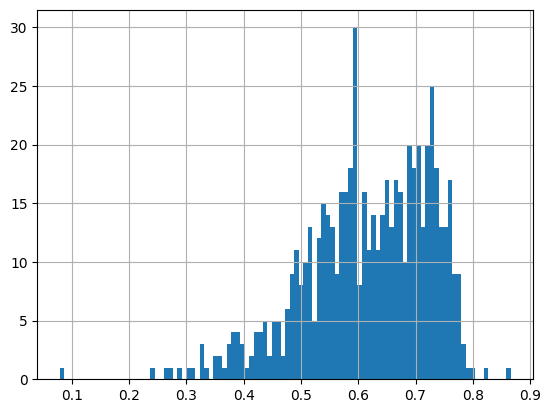

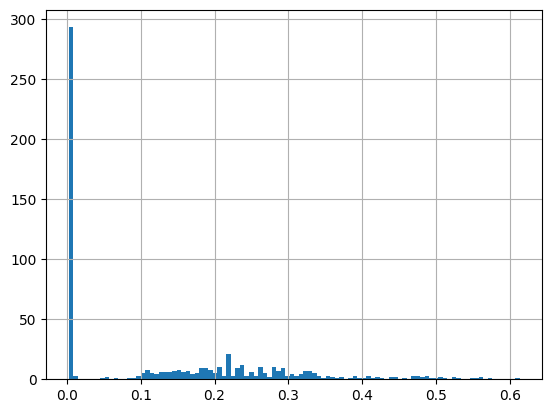

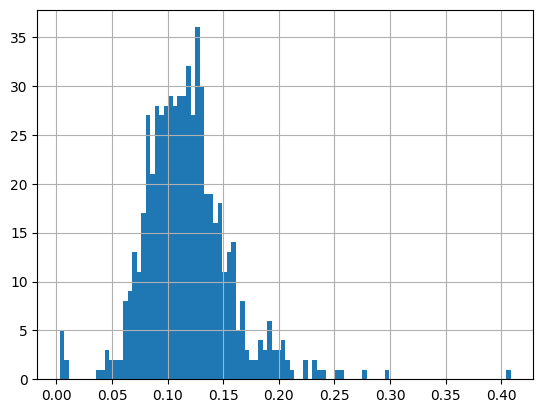

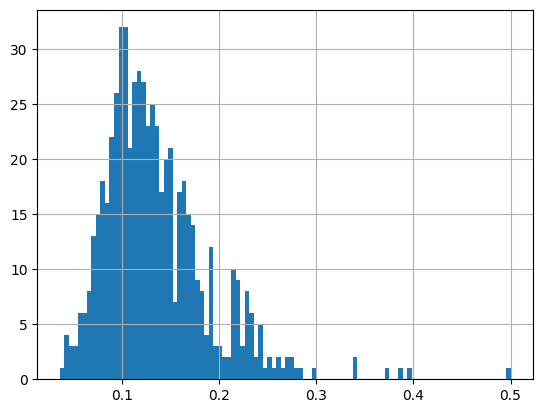

In [16]:
finetune_distribution1 = finetune_delta_distribution[0,:,:,:]
finetune_distribution2 = finetune_delta_distribution[1,:,:,:]
finetune_distribution3 = finetune_delta_distribution[2,:,:,:]
finetune_distribution4 = finetune_delta_distribution[3,:,:,:]
finetune_distribution5 = finetune_delta_distribution[4,:,:,:]
finetune_distribution = 1 / 5 * (finetune_distribution1 + finetune_distribution2 + finetune_distribution3 + finetune_distribution4 + finetune_distribution5)
df_finetune_distribution = pd.DataFrame(finetune_distribution2[:,:,0].squeeze()).T
print(df_finetune_distribution.describe())
for i in range(df_finetune_distribution.shape[1]):
    df_finetune_distribution.iloc[:,i].hist(bins=100)
    plt.show()

In [17]:
torch.save(finetune_distribution, 'configs/historical_clients_distribution.pkl')

In [23]:
finetune_delta_sum_by_party.shape
for i in range(finetune_delta_sum_by_party.shape[0]):
    # replace the nan with 0
    finetune_delta_sum_by_party[i] = np.nan_to_num(finetune_delta_sum_by_party[i])
    abs_mean = np.mean(np.abs(finetune_delta_sum_by_party[i]))
    print(f"{i}: {abs_mean}")
# nursery

0: 0.23486395177137456
1: 0.04869354163715616
2: 0.026643684111132947
3: 0.02096638730384196
4: 0.020877938719359616
5: 0.02036480465545901
6: 0.024099444932483796
7: 0.020759210589899643
8: 0.01633025334341801
9: 0.009131085773629213
10: 0.006790426667284919
11: 0.005311666361289099
12: 0.005128611823757334
13: 0.00507461870732368
14: 0.004926008902286412
15: 0.004330695057743772
16: 0.004253861922993868
17: 0.003851602101494791
18: 0.004004670602191861
19: 0.003696040055714548
20: 0.003797448987015135
21: 0.0034537431946664583
22: 0.003231924655905459
23: 0.0034310481308881813
24: 0.0030959635260902965
25: 0.003099794347236942
26: 0.0027564805703392875
27: 0.0026544319460420716
28: 0.0024448919914624033
29: 0.0027906356096985595
30: 0.00244814075359803
31: 0.0025623322963268342
32: 0.0020735279427608476
33: 0.0023350581882793145
34: 0.0022270090021581077
35: 0.0020252068121529494
36: 0.002150694640042881
37: 0.0021123930825463805
38: 0.0019535563567575688
39: 0.0018978263388271443
40

In [ ]:
finetune_delta_sum_by_party.shape
for i in range(finetune_delta_sum_by_party.shape[0]):
    # replace the nan with 0
    finetune_delta_sum_by_party[i] = np.nan_to_num(finetune_delta_sum_by_party[i])
    abs_mean = np.mean(np.abs(finetune_delta_sum_by_party[i]))
    print(f"{i}: {abs_mean}")
# adult income

0: 0.19695785609727168
1: 0.04292571268694535
2: 0.022144499000913316
3: 0.016713693118374548
4: 0.013729808697733258
5: 0.012008907359473122
6: 0.01078433788740406
7: 0.009848683691599308
8: 0.009103081098098889
9: 0.008486834248267246
10: 0.007961784113220662
11: 0.007504214547480496
12: 0.007098844481633041
13: 0.0067357306926548125
14: 0.006407745906891343
15: 0.006109166359616433
16: 0.005835917872528002
17: 0.005584708771243003
18: 0.005353672447098794
19: 0.00514027318738793
20: 0.004942238113342489
21: 0.004758058942694498
22: 0.00458586269071349
23: 0.004424530202662219
24: 0.004272863901386958
25: 0.00413011115324573
26: 0.003995291264578004
27: 0.0038678338009749233
28: 0.0037471516307034233
29: 0.003632576531275116
30: 0.0035237319048879033
31: 0.00342034211321896
32: 0.0033216256002241867
33: 0.003227864627679773
34: 0.0031380614455210894
35: 0.00305241398694166
36: 0.0029705450300035532
37: 0.0028923250327078038
38: 0.002817338102873229
39: 0.0027454894232283268
40: 0.002

In [4]:
finetune_delta_sum_by_party.shape
for i in range(finetune_delta_sum_by_party.shape[0]):
    # replace the nan with 0
    finetune_delta_sum_by_party[i] = np.nan_to_num(finetune_delta_sum_by_party[i])
    abs_mean = np.mean(np.abs(finetune_delta_sum_by_party[i]))
    print(f"{i}: {abs_mean}")
# credit

0: 0.5205953042613888
1: 0.21435165790149055
2: 0.12370730525290571
3: 0.08754160913714878
4: 0.06879251739177092
5: 0.057508088483265496
6: 0.0491069670092947
7: 0.04299905084275615
8: 0.03802928190082114
9: 0.033980296292066337
10: 0.030623349540505673
11: 0.027858334203663866
12: 0.025603541302507093
13: 0.023766687797310816
14: 0.02224557693696522
15: 0.02093474526684225
16: 0.019780306690953715
17: 0.01876926032669389
18: 0.017889622830774103
19: 0.017119002452264387
20: 0.01643884401596129
21: 0.015824658453667657
22: 0.015266369143486143
23: 0.014751651978563401
24: 0.014276646565379993
25: 0.013836286804061633
26: 0.013426618281287274
27: 0.013044565645945631
28: 0.012687812534771605
29: 0.012353919761363226
30: 0.012041329191377436
31: 0.011747478705294263
32: 0.01147167979258159
33: 0.011211381342436209
34: 0.010966125586754305
35: 0.010734578298974532
36: 0.010515317775777584
37: 0.010307402260654259
38: 0.01010990313739942
39: 0.009922253465961756
40: 0.009743953404303427
4